In [1]:
!pip install folium

In [89]:
import seaborn as sns 
import pandas as pd

In [24]:
df = sns.load_dataset('titanic')

In [25]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [26]:
df.info()
#아래 결과를 보면 누락데이터도 많음을 알 수 있다. 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [27]:
df['deck'].value_counts(dropna=False)
#누락데이터 체크
#value.counts : 유일한 값들의 갯수를 세는 함수

NaN    688
C       59
B       47
D       33
E       32
A       15
F       13
G        4
Name: deck, dtype: int64

In [28]:
df.isnull().sum(axis=0)
#컬럼별 null데이터 갯수를 보여준다. 


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [29]:
df['deck'].isnull().count() 
#null이 있는지 확인하고 갯수를 세어봄

891

In [30]:

df.head().isnull()
df.head().notnull()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True


In [31]:
# age 컬럼의 Nan 처리 
# 1. 제거하는 방법 
df_age = df.dropna(subset = ['age'], how = 'any', axis = 0)
#any: 요소 중에 있냐
#all: 모두가 그러냐 
#dropna : Nan 들어 있는 것 제거
print(len(df),len(df_age))


891 714


In [35]:
import numpy as np
np.floor(34.5)

34.0

In [34]:
# 2. 치환하는 방법
# 1) 평균으로 치환
df.head(10)
mean_age = df['age'].fillna(df['age'].mean(axis = 0))
#Nan 위치에 채우는데, age의 평균값을 넣는다. 
mean_age.head(10)



0    22.000000
1    38.000000
2    26.000000
3    35.000000
4    35.000000
5    29.699118
6    54.000000
7     2.000000
8    27.000000
9    14.000000
Name: age, dtype: float64

In [37]:
# 2. 치환하는 방법
# 1) 평균으로 치환
df.head(10)
mean_age = df['age'].fillna(np.floor(df['age'].mean(axis = 0)))
#Nan 위치에 채우는데, age의 평균값을 넣는다. 
mean_age.head(10)



0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5    29.0
6    54.0
7     2.0
8    27.0
9    14.0
Name: age, dtype: float64

In [41]:
#dropna

df_t = df.dropna(axis = 1, thresh=500)
#thrash 에 지정한 숫자보다 많은 값을 찾아서 dropna함  >> 데이터 분석에 유효하지 않은 column 이기 때문에 제거함

df_t.columns
df_t.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [47]:
df['embark_town'][825:830]

825     Queenstown
826    Southampton
827      Cherbourg
828     Queenstown
829            NaN
Name: embark_town, dtype: object

In [59]:
#문자의 경우
df.isnull().sum(axis=0)

#1. 가장 많이 나오는 값으로 치환
most_freq = df['embark_town'].value_counts(dropna = True).idxmax()
df_em = df['embark_town'].fillna(most_freq)
df_em[825:830]
df['embark_town'].fillna(most_freq, inplace = True)
print(most_freq)

print("-----------")
df_em

Southampton
-----------


0      Southampton
1        Cherbourg
2      Southampton
3      Southampton
4      Southampton
          ...     
886    Southampton
887    Southampton
888    Southampton
889      Cherbourg
890     Queenstown
Name: embark_town, Length: 891, dtype: object

In [60]:
#2. 앞 또는 뒤에 오는 값으로 치환
df['embark_town'].fillna(method='ffill')[825:831]

825     Queenstown
826    Southampton
827      Cherbourg
828     Queenstown
829    Southampton
830      Cherbourg
Name: embark_town, dtype: object

In [61]:
df['embark_town'].fillna(method='bfill')[825:831]

825     Queenstown
826    Southampton
827      Cherbourg
828     Queenstown
829    Southampton
830      Cherbourg
Name: embark_town, dtype: object

In [64]:
#titanic 데이터를 로드해서 df에 저장한 후 
df = sns.load_dataset("titanic")

#1. 각 자료의 Nan의 갯수를 확인
df.info()
df.isnull().sum(axis=0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [66]:
#2. Nan 의 갯수가 전체 데이터의 반절이 넘으면 삭제
df.dropna(thresh = len(df)/2, axis = 1, inplace =True)
df. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  889 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 79.4+ KB


In [67]:
#3. Nan 데이터의 컬럼이 숫자인 경우 해당 컬럼의 최소값으로 Nan을 대체
df['age'].fillna(df['age'].min(),inplace=True)
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [ ]:
# .duplicated()  : 중복되는 것이 있는지 확인하는 함수


In [74]:
#데이터 표준화
df_mpg =sns.load_dataset('mpg')
df_mpg.head(3)

#단위 환산,  갤런 >> 리터, 마일 >> 키로미터
mpg_to_kl = 1.60934/3.78541

df_mpg['kl'] = df_mpg['mpg']*mpg_to_kl
df_mpg.head(3)
df_mpg['kl'] = df_mpg['kl'].round(2)
#round(2) : 소수점 미만 2자리까지만 출력
df_mpg.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,kl
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,7.65
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,6.38
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,7.65


In [82]:
#horsepower 자료에 Nan 확인
df_mpg.dropna(subset=['horsepower'],axis=0, inplace =True)
df_mpg.info()
#2. 자료형 변환
print(df_mpg['origin'].dtypes)
df_mpg['origin']=df_mpg['origin'].astype('category')
print(df_mpg['origin'].dtypes)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
 9   kl            392 non-null    float64
dtypes: float64(5), int64(3), object(2)
memory usage: 33.7+ KB
object
category


In [ ]:
# 본데이터를 바꾸지 않는 선에서 사용하기 위해 .copy()로 복사해서 사용한다. 

In [ ]:
#df_1 = pd.read_scv('./data/auto-mpg.scv')
#df_1.columns = ['mpg', ]

#df_1['horsepower'].replace('?', np.nan,inplace = True)
#df_1.dropna(subset=['horsepower'], axis = 0, inplace =True)
#df_1.info()

In [84]:
df_mpg['model_year'].unique() #category로 데이터타입 변경
df_mpg['model_year'] = df_mpg['model_year'].astype['category']

TypeError: 'method' object is not subscriptable

In [92]:
df_mpg.info()

# 1. 결측치 처리
# 2. 데이터 타입 변경 -> 'object' -> 'float', 범주형 'object' -> 'category'
# 3. 단위 환산
# 4. 연속적인 데이터 -> 범주형 데이터로 변환, np.histogram 은 구간을 나누어 줌
# histogram은 리턴이 데이터를 2개

cnt, hp_bin_div = np.histogram(df_mpg['horsepower'], bins =3)
bin_names = ['저출력', '보통출력', '고출력']
df_mpg['hp_bin'] = pd.cut(x = df_mpg['horsepower'],   #데이터 배열
                         bins = hp_bin_div,           #경계값 리스트 
                         labels = bin_names,          #bin 이름
                         include_lowest = True        #첫 경계값 포함
                         )

df_mpg

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   mpg           392 non-null    float64 
 1   cylinders     392 non-null    int64   
 2   displacement  392 non-null    float64 
 3   horsepower    392 non-null    float64 
 4   weight        392 non-null    int64   
 5   acceleration  392 non-null    float64 
 6   model_year    392 non-null    int64   
 7   origin        392 non-null    category
 8   name          392 non-null    object  
 9   kl            392 non-null    float64 
 10  hp_bin        392 non-null    category
dtypes: category(2), float64(5), int64(3), object(1)
memory usage: 31.6+ KB


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,kl,hp_bin
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,7.65,보통출력
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,6.38,보통출력
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,7.65,보통출력
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,6.80,보통출력
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,7.23,보통출력
...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl,11.48,저출력
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup,18.71,저출력
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage,13.60,저출력
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger,11.90,저출력


In [93]:
# df_1.head()
# df_1 의 horsepower의 bin 의 갯수를 4개로
# cnt, bin_list = np.histogram(df_1['horsepower'], bins = 4)

# bin의 이름을 ['low','modium','hight','very height']
# df_1['hp_bin]'= pd.cut(x=df_1['horsepower'], bins = bin_list, labels = ['low', 'modium', 'hight', 'very height'], include_lowest=True)
# df_1[['horsepower','hp_bin']]

#연속형 보다는 범주형이 분석하기 용이해서 바꿔준다. 

NameError: name 'df_1' is not defined

In [95]:
pd.get_dummies(df_mpg['hp_bin'])

#범주데이터가 컬럼명으로 간다. 값은 0,1로 설정됨.

,저출력,보통출력,고출력
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
393,1,0,0
394,1,0,0
395,1,0,0
396,1,0,0


In [97]:
#sklearn 패키지의 preproceing 모듈의 원-핫-인코딩
from sklearn import preprocessing


In [98]:
# 전처리를 위한 encoder 객체를 만듬. 
label_encoder = preprocessing.LabelEncoder()  #label encoder 생성
onehot_encoder = preprocessing.OneHotEncoder()

#label_encoder로 문자열 범주를 숫자형 범주로 변환
#onehot_labeled - label_encoder.fit_transform(df_1['hp_bin'])
#onehot_labeled[:10]

#2차원 배열
#onehot_reshaped = onehot_labeled.reshape(len(onehot_labeled),1)
#onehot_reshpaed

#화소 행렬로 변환
#onehot_fitted = onehot_encoder.fit_transform(onehot_reshaped)
#print(type(onehot_fitted))
#print(onehot_fitted)



In [ ]:
#데이터 전처리
# 1. 결측치 처리 
# 2. 데이터형 변환
# 3. 범주형으로 변경    (구간 분할을 해서 진행, np.histogram, pd.cut())
# 4. onehot encoding    (pandas에서는 더미변수가 제공됨)
# 5. 정규화 nomalizing

In [ ]:
df=pd.read_csv('./data/auto-mpg.csv',header = None)

df.columns = ['mpg','cylinders','displacement','horsepower','weight','accerleration']

In [100]:
!pip install tensorflow

  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4829 sha256=f00af789116a53c22bb2c15630229d44d79336bab4fc96215db0d110fdd336af
  Stored in directory: c:\users\daehy\appdata\local\pip\cache\wheels\a0\16\9c\5473df82468f958445479c59e784896fa24f4a5fc024b0f501
Successfully built termcolor


In [111]:
df = pd.read_csv('./data/stock-data.csv')
df.head()


,Date,Close,Start,High,Low,Volume
0,2018-07-02,10100,10850,10900,10000,137977
1,2018-06-29,10700,10550,10900,9990,170253
2,2018-06-28,10400,10900,10950,10150,155769
3,2018-06-27,10900,10800,11050,10500,133548
4,2018-06-26,10800,10900,11000,10700,63039


In [112]:
df['New_Date']= pd.to_datetime(df['Date'])
df.head()
df.info()
df.set_index('New_Date', inplace=True)
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      20 non-null     object        
 1   Close     20 non-null     int64         
 2   Start     20 non-null     int64         
 3   High      20 non-null     int64         
 4   Low       20 non-null     int64         
 5   Volume    20 non-null     int64         
 6   New_Date  20 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 1.2+ KB


,Date,Close,Start,High,Low,Volume
New_Date,,,,,,
2018-07-02,2018-07-02,10100,10850,10900,10000,137977
2018-06-29,2018-06-29,10700,10550,10900,9990,170253
2018-06-28,2018-06-28,10400,10900,10950,10150,155769
2018-06-27,2018-06-27,10900,10800,11050,10500,133548
2018-06-26,2018-06-26,10800,10900,11000,10700,63039


In [113]:
#Date 열을 없애줌. axis = 1
df.drop('Date',axis=1,inplace=True)
df.head()

,Close,Start,High,Low,Volume
New_Date,,,,,
2018-07-02,10100,10850,10900,10000,137977
2018-06-29,10700,10550,10900,9990,170253
2018-06-28,10400,10900,10950,10150,155769
2018-06-27,10900,10800,11050,10500,133548
2018-06-26,10800,10900,11000,10700,63039


In [115]:
df.reset_index(inplace=True)
df.head()

,New_Date,Close,Start,High,Low,Volume
0,2018-07-02,10100,10850,10900,10000,137977
1,2018-06-29,10700,10550,10900,9990,170253
2,2018-06-28,10400,10900,10950,10150,155769
3,2018-06-27,10900,10800,11050,10500,133548
4,2018-06-26,10800,10900,11000,10700,63039


In [123]:
print("year:   ",df['New_Date'].dt.year[0])
print("-----------")
print("month:  ",df['New_Date'].dt.month[0])
print("-----------")
print("day:    ",df['New_Date'].dt.day[0])

year:    2018
-----------
month:   7
-----------
day:     2


In [125]:
df['Year'] = df['New_Date'].dt.year[0]
df['Month'] = df['New_Date'].dt.month[0]
df['Day'] = df['New_Date'].dt.day[0]
df.head()

,New_Date,Close,Start,High,Low,Volume,Year,Month,Day
0,2018-07-02,10100,10850,10900,10000,137977,2018,7,2
1,2018-06-29,10700,10550,10900,9990,170253,2018,7,2
2,2018-06-28,10400,10900,10950,10150,155769,2018,7,2
3,2018-06-27,10900,10800,11050,10500,133548,2018,7,2
4,2018-06-26,10800,10900,11000,10700,63039,2018,7,2


In [129]:
#stock-data를 파일에서 잃어 DataFrame으로 저장
#Date 컬럼을 Datatime 으로 형 변경
#Date 컬럼을 인덱스로 설정
#날짜별로 start와 close값을 그래프로 나타내기.
df = pd.read_csv('./data/stock-data.csv')
df['Datetime']= pd.to_datetime(df['Date'])
df.set_index('Datetime', inplace=True)
df.head()

import matplotlib.pyplot as plt


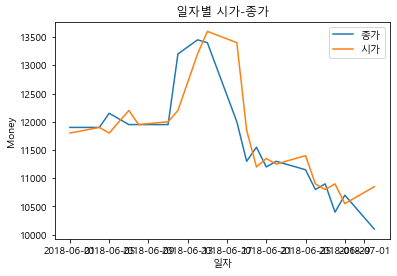

In [132]:
import matplotlib as mat
mat.rcParams["font.family"] = 'Malgun Gothic'

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.plot(df['Close'], label = '종가')
ax.plot(df['Start'], label = '시가')

ax.set_title('일자별 시가-종가')
ax.set_xlabel('일자')
ax.set_ylabel('Money')

ax.legend(loc='best')
plt.show()